In [28]:
import pandas as pd

total_data = pd.read_csv("../data/raw/housing.csv")

In [29]:
from sklearn.model_selection import train_test_split

total_data = total_data[["MedInc", "Latitude", "Longitude"]]

X_train, X_test = train_test_split(total_data, test_size = 0.2, random_state = 666)

X_train.head()

,MedInc,Latitude,Longitude
7621,4.2500,33.87,-118.25
18863,3.0962,38.11,-122.21
10601,7.7589,33.67,-117.81
8483,5.3292,33.92,-118.29
1732,2.0353,37.96,-122.35


In [30]:
from sklearn.cluster import KMeans

# Train unsupervised model
model_unsup = KMeans(n_clusters = 6, n_init = "auto", random_state = 666)
model_unsup.fit(X_train)

KMeans(n_clusters=6, n_init='auto', random_state=666)

In [31]:
y_train = list(model_unsup.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
7621,4.2500,33.87,-118.25,2
18863,3.0962,38.11,-122.21,3
10601,7.7589,33.67,-117.81,2
8483,5.3292,33.92,-118.29,2
1732,2.0353,37.96,-122.35,3


In [32]:
y_test = list(model_unsup.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
6015,3.7933,34.07,-117.79,4
16296,2.4010,37.97,-121.22,3
20597,2.1111,39.16,-121.58,3
11111,3.5329,33.84,-117.90,4
3300,2.3179,38.94,-122.62,3


In [33]:
from sklearn.tree import DecisionTreeClassifier

# Train a supervised model
model_sup = DecisionTreeClassifier(random_state = 666)
model_sup.fit(X_train, y_train)

DecisionTreeClassifier(random_state=666)

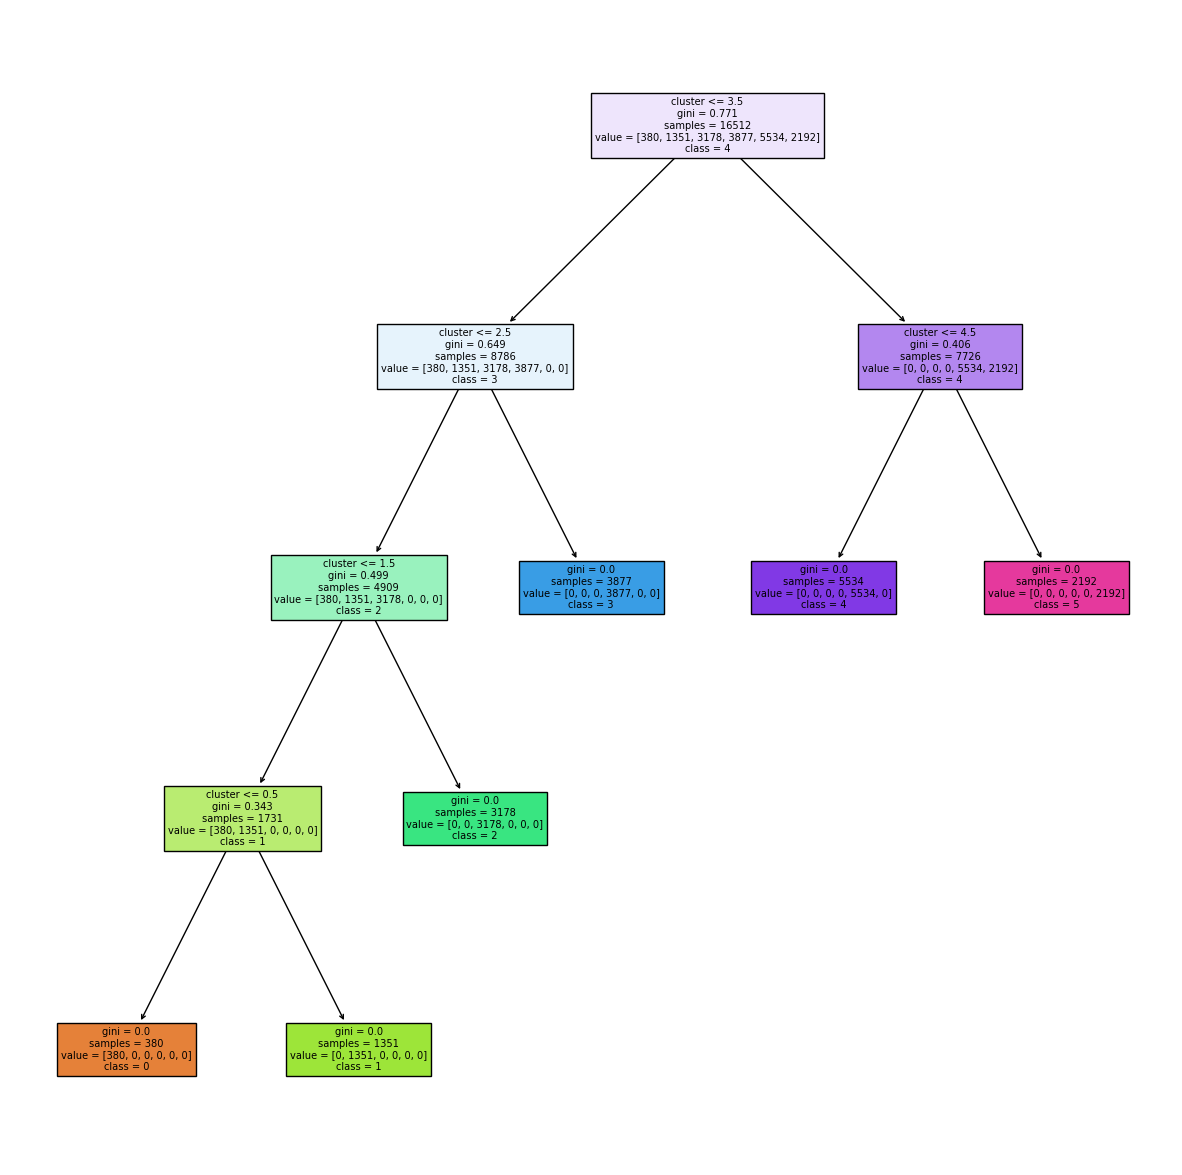

In [34]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [35]:
from sklearn.metrics import accuracy_score

y_pred = model_sup.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [37]:
from pickle import dump

dump(model_unsup, open("../models/k-means_default_666.sav", "wb"))
dump(model_sup, open("../models/decision_tree_classifier_default_666.sav", "wb"))